## Data Analytics Final Project  

## Step 0 : Imports and Reading Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [2]:
data_df = pd.read_csv('Datasets/sales_data.csv')
df = data_df.copy()

## Step 1: Data Understanding
- Dataframe Shape
- head and tail
- Dtypes
- describe
- Columns

In [3]:
df.shape

(113036, 18)

In [4]:
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [5]:
df.dtypes

Date                object
Day                  int64
Month               object
Year                 int64
Customer_Age         int64
Age_Group           object
Customer_Gender     object
Country             object
State               object
Product_Category    object
Sub_Category        object
Product             object
Order_Quantity       int64
Unit_Cost            int64
Unit_Price           int64
Profit               int64
Cost                 int64
Revenue              int64
dtype: object

In [6]:
df.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [7]:
#Display our Columns
df.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')

## Step 2 : Data Preparation
- Dropping some Columns to make our analysis fare and easier in graph generating
- Identifying Duplicated Columns

In [53]:
## Dropping some columns by commenting them out to reduce the number of columns
## to Aid in making the analysis easier to analyse

Data_df = df[[#'Date',
         #, 'Month', 
                'Customer_Age','Day',
                #'Age_Group',
         'Customer_Gender', 'Country', 'State',
                #'Product_Category', 
               #'Sub_Category',,'Unit_Cost'
         'Product', 
           'Year','Order_Quantity','Cost','Unit_Price','Profit','Revenue']].copy()

In [54]:
##Display the data types after Dropping some columns
df.dtypes

Date                object
Day                  int64
Month               object
Year                 int64
Customer_Age         int64
Age_Group           object
Customer_Gender     object
Country             object
State               object
Product_Category    object
Sub_Category        object
Product             object
Order_Quantity       int64
Unit_Cost            int64
Unit_Price           int64
Profit               int64
Cost                 int64
Revenue              int64
dtype: object

In [55]:
## Dropping some rows in our dataset data[1001:113036] 
#df = df.drop[1000:113036].copy() 
df.drop(df.index[1000 : 113036], axis=0, inplace=True)

In [56]:
df.shape

(1000, 18)

In [116]:
## Checking for missing and unique values 

##fortunately the Dataframe has no missing values

## Step 3: Data Preprocessing 

### Grouping Data into Numerical and Categorical

In [58]:
numerical = ['Day', 'Order_Quantity', 'Unit_Price', 'Profit', 'Cost', 'Revenue', 'Customer_Age', 'Year']

categorical = ['Date', 'Month', 'Age_Group', 'Customer_Gender', 'Country', 'State', 'Product_Category', 'Sub_Category', 'Product']

## Step 4: Descriptive Analysis
- Total Revenue, Highest Revenue, Lowest Revenue 

In [59]:
## Total Revenue

df['Revenue'].sum()

825912

In [60]:
## Minimum Revenue

df['Revenue'].min()

94

In [61]:
## Highest revenue
df['Revenue'].max()

3564

In [118]:
## renaming the Group Data

cat_cols = ['Date','Month','Customer_Gender', 'Country','State','Product_Category', 'Sub_Category','Product','Customer_Gender', 'Age_Group']

num_cols = ['Day', 'Year', 'Customer_Age','Order_Quantity', 'Unit_Price','Profit','Cost', 'Revenue']

In [63]:
## Assigning renamed group to a variable
cat_df = df[cat_cols]

num_df = df[num_cols]

In [64]:
## Finding the Corelationship of our numerical values
numerical_df = num_df.corr()

numerical_df

,Day,Year,Customer_Age,Order_Quantity,Unit_Price,Profit,Cost,Revenue
Day,1.000000,0.003781,0.002728,0.041222,-0.022474,0.038498,0.034727,0.037221
Year,0.003781,1.000000,0.063382,-0.007594,-0.021248,-0.008131,-0.016076,-0.011389
Customer_Age,0.002728,0.063382,1.000000,0.087067,-0.032432,0.085836,0.080013,0.084031
Order_Quantity,0.041222,-0.007594,0.087067,1.000000,-0.233417,0.959090,0.984423,0.975403
Unit_Price,-0.022474,-0.021248,-0.032432,-0.233417,1.000000,-0.084976,-0.087215,-0.086419
Profit,0.038498,-0.008131,0.085836,0.959090,-0.084976,1.000000,0.973813,0.995782
Cost,0.034727,-0.016076,0.080013,0.984423,-0.087215,0.973813,1.000000,0.990565
Revenue,0.037221,-0.011389,0.084031,0.975403,-0.086419,0.995782,0.990565,1.000000


In [121]:
## Finding the Corelationship of our categorical values
df[categorical]


,Date,Month,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product
0,2013-11-26,November,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike
1,2015-11-26,November,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike
2,2014-03-23,March,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike
3,2016-03-23,March,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike
4,2014-05-15,May,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike
...,...,...,...,...,...,...,...,...,...
995,2015-09-17,September,Youth (<25),F,Germany,Saarland,Accessories,Bike Stands,All-Purpose Bike Stand
996,2013-10-27,October,Youth (<25),F,Germany,Nordrhein-Westfalen,Accessories,Bike Stands,All-Purpose Bike Stand
997,2015-10-27,October,Youth (<25),F,Germany,Nordrhein-Westfalen,Accessories,Bike Stands,All-Purpose Bike Stand
998,2013-09-19,September,Adults (35-64),F,Germany,Hamburg,Accessories,Bike Stands,All-Purpose Bike Stand


Text(0.5, 1.0, 'correlation between numerical values')

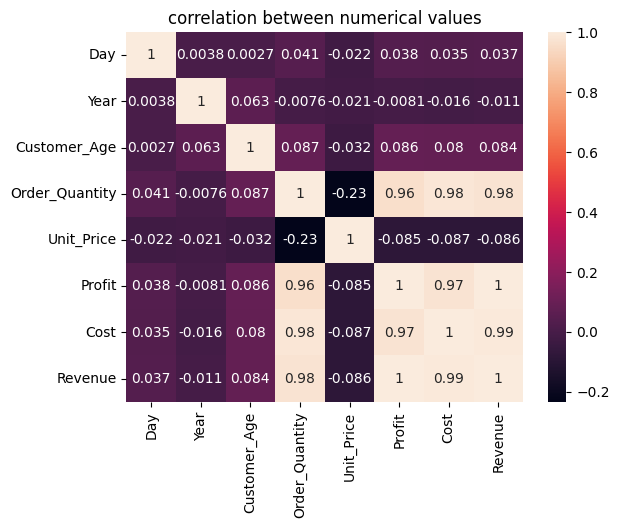

In [65]:
#  The above correlationship analysis
sns.heatmap(numerical_df, xticklabels= numerical_df.columns, yticklabels= numerical_df.columns, annot = True)
plt.title('correlation between numerical values')

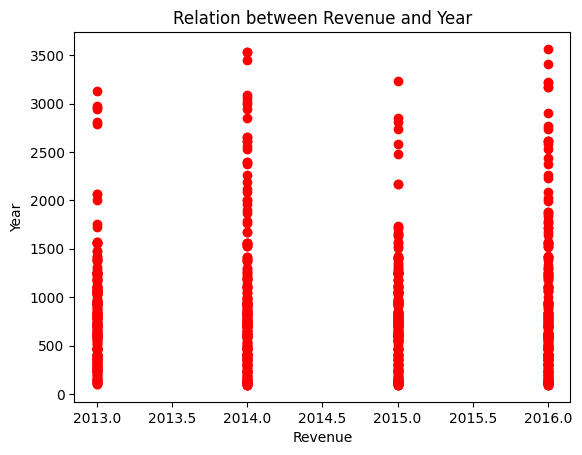

In [66]:
## Correlationship between Revenue and Year
plt.scatter(Data_df['Year'], Data_df['Revenue'], c = 'red')

plt.title('Relation between Revenue and Year')

plt.ylabel('Year')

plt.xlabel('Revenue')

plt.savefig('Revenue_year_rel.png')

plt.show()

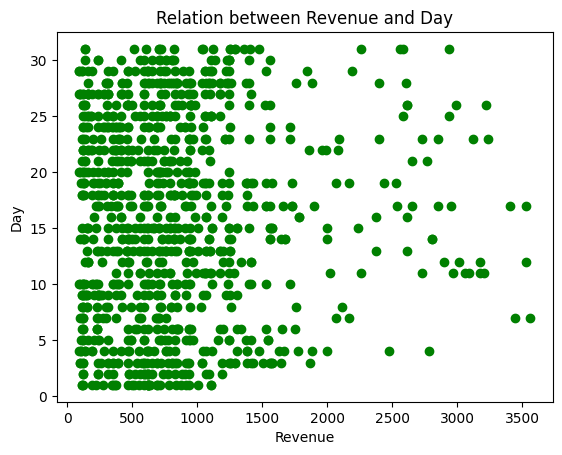

In [73]:
## CORrELATIONSHIP between Revenue and Day
plt.scatter(Data_df['Revenue'], Data_df['Day'], c = 'Green')

plt.title('Relation between Revenue and Day')

plt.ylabel('Day')

plt.xlabel('Revenue')

plt.savefig('Revenue_Day_rel.png')

plt.show()

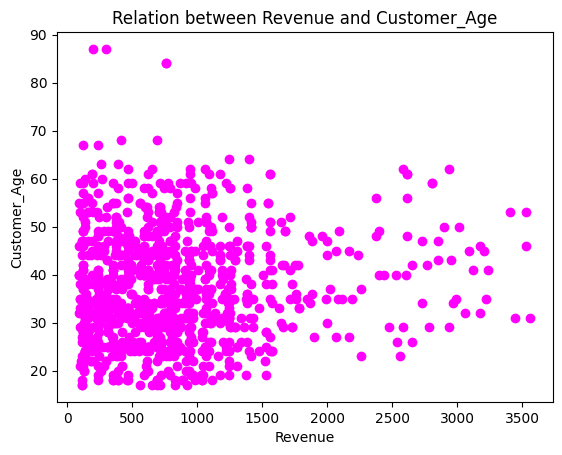

In [74]:
## CORELATION between Revenue and Customer_Age
plt.scatter(Data_df['Revenue'], Data_df['Customer_Age'], c = 'magenta')

plt.title('Relation between Revenue and Customer_Age')

plt.ylabel('Customer_Age')

plt.xlabel('Revenue')

plt.savefig('Revenue_CAge_rel.png')

plt.show()

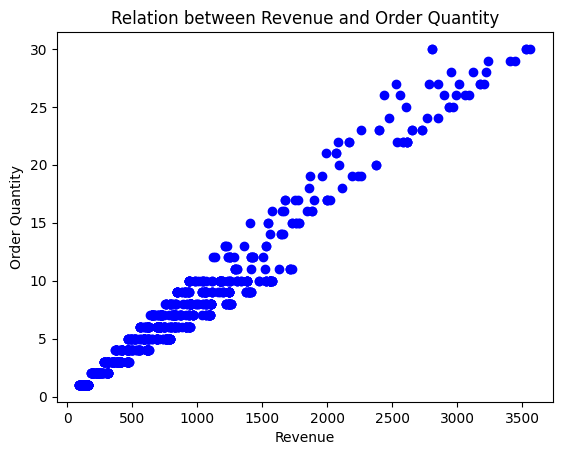

In [75]:
## CORELATION between Revenue and Order Quantity
plt.scatter(Data_df['Revenue'], Data_df['Order_Quantity'], c = 'blue')

plt.title('Relation between Revenue and Order Quantity')

plt.ylabel('Order Quantity')

plt.xlabel('Revenue')

plt.savefig('Revenue_CAge_rel.png')

plt.show()

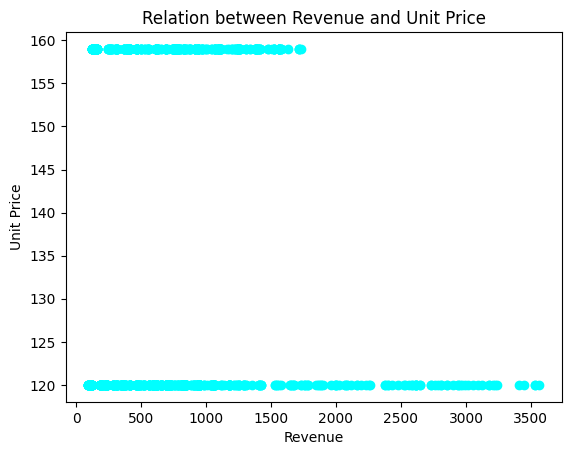

In [79]:
## CORELATION between Revenue and Unit Price
plt.scatter(Data_df['Revenue'], Data_df['Unit_Price'], c = 'cyan')

plt.title('Relation between Revenue and Unit Price')

plt.ylabel('Unit Price')

plt.xlabel('Revenue')

plt.savefig('Revenue_numitprice_rel.png')

plt.show()

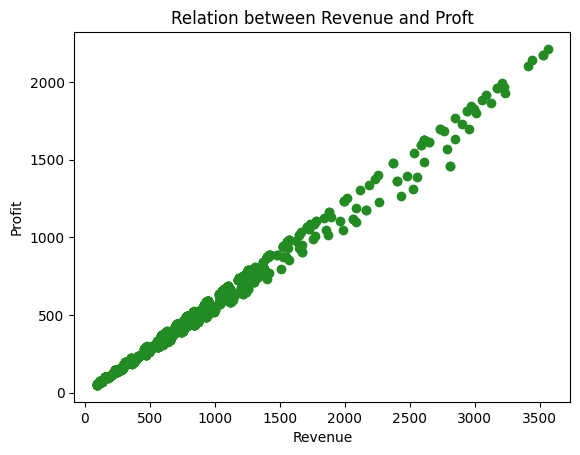

In [82]:
## CORELATION between Revenue and Profit
plt.scatter(Data_df['Revenue'], Data_df['Profit'], c = 'forestgreen')

plt.title('Relation between Revenue and Proft')

plt.ylabel('Profit')

plt.xlabel('Revenue')

plt.savefig('Revenue_Profit_rel.png')

plt.show()

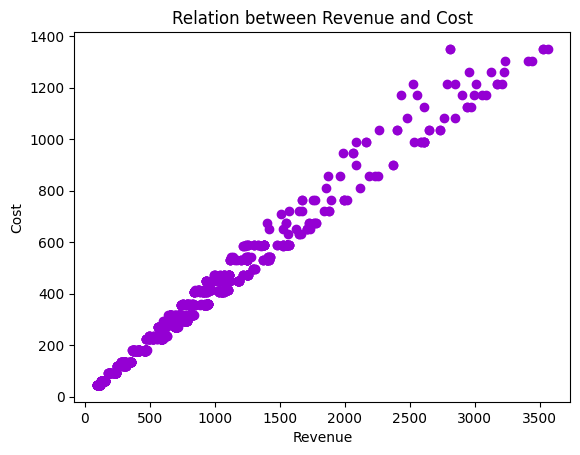

In [84]:
## CORELATION between Revenue and Cost
plt.scatter(Data_df['Revenue'], Data_df['Cost'], c = 'darkviolet')

plt.title('Relation between Revenue and Cost')

plt.ylabel('Cost')

plt.xlabel('Revenue')

plt.savefig('Revenue_Cost_rel.png')

plt.show()

In [28]:
numerical_df = num_df.corr()

numerical_df

,Day,Year,Customer_Age,Order_Quantity,Unit_Price,Profit,Cost,Revenue
Day,1.000000,0.003781,0.002728,0.041222,-0.022474,0.038498,0.034727,0.037221
Year,0.003781,1.000000,0.063382,-0.007594,-0.021248,-0.008131,-0.016076,-0.011389
Customer_Age,0.002728,0.063382,1.000000,0.087067,-0.032432,0.085836,0.080013,0.084031
Order_Quantity,0.041222,-0.007594,0.087067,1.000000,-0.233417,0.959090,0.984423,0.975403
Unit_Price,-0.022474,-0.021248,-0.032432,-0.233417,1.000000,-0.084976,-0.087215,-0.086419
Profit,0.038498,-0.008131,0.085836,0.959090,-0.084976,1.000000,0.973813,0.995782
Cost,0.034727,-0.016076,0.080013,0.984423,-0.087215,0.973813,1.000000,0.990565
Revenue,0.037221,-0.011389,0.084031,0.975403,-0.086419,0.995782,0.990565,1.000000


## Histogram visualization (Frequency distribution of Day)

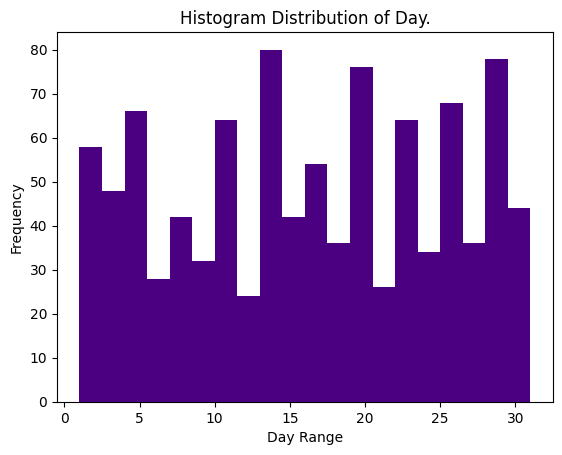

In [86]:
plt.hist(df['Day'], bins = 20, color='indigo')

plt.title('Histogram Distribution of Day.')

plt.ylabel('Frequency')

plt.xlabel('Day Range')

plt.savefig('Hist_Day_rel.png')

plt.show()

## Histogram visualization (Frequency distribution of Year)

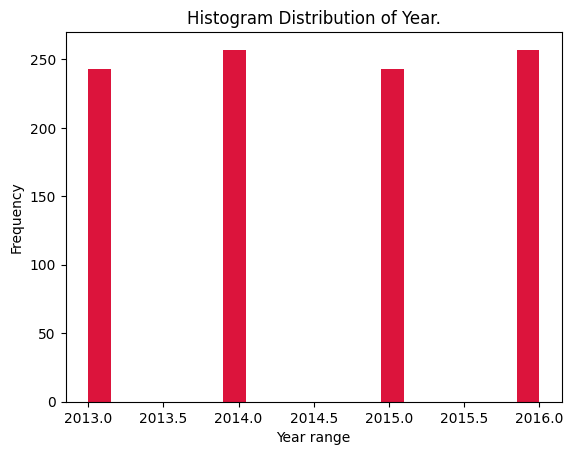

In [88]:
plt.hist(Data_df['Year'], bins= 20, color='crimson')

plt.title('Histogram Distribution of Year.')

plt.ylabel('Frequency')

plt.xlabel('Year range')

plt.savefig('Hist_Year_rel.png')

plt.show()

## Histogram visualization (Frequency distribution of Customer Age)

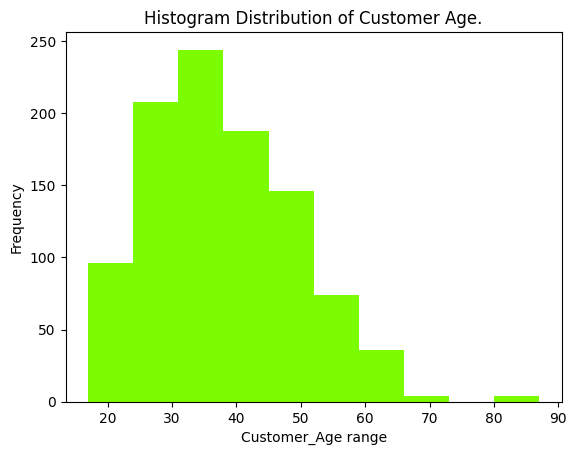

In [90]:
plt.hist(Data_df['Customer_Age'], color='lawngreen')

plt.title('Histogram Distribution of Customer Age.')

plt.ylabel('Frequency')

plt.xlabel('Customer_Age range')

plt.savefig('Hist_CustomerAge_rel.png')

plt.show()

## Histogram visualization (Frequency distribution of Order Quantity)

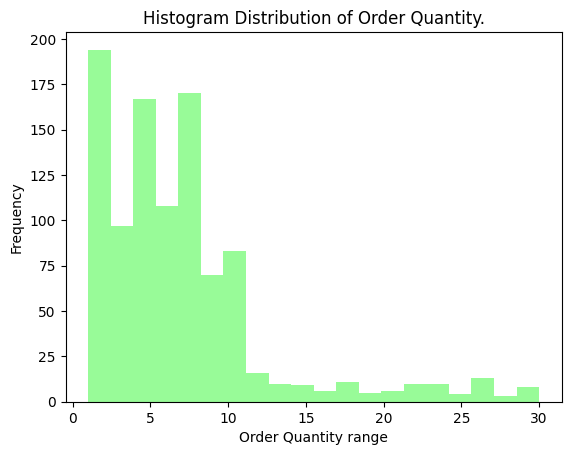

In [91]:
plt.hist(df['Order_Quantity'], bins= 20, color='palegreen')

plt.title('Histogram Distribution of Order Quantity.')

plt.ylabel('Frequency')

plt.xlabel('Order Quantity range')

plt.savefig('Hist_OrderQuantity_rel.png')

plt.show()

## Histogram visualization (Frequency distribution of Unit Price)

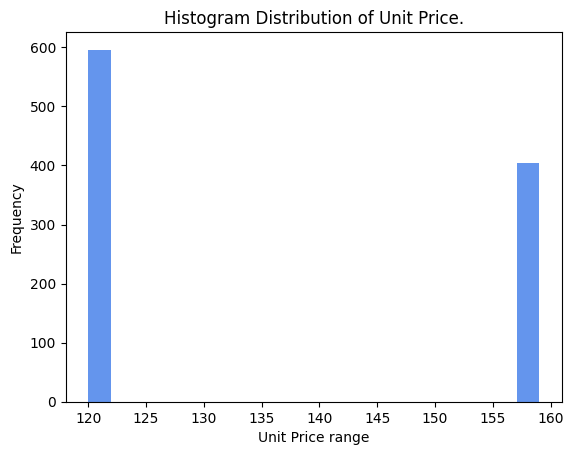

In [93]:
plt.hist(Data_df['Unit_Price'], bins= 20, color='cornflowerblue')

plt.title('Histogram Distribution of Unit Price.')

plt.ylabel('Frequency')

plt.xlabel('Unit Price range')

plt.savefig('Hist_UnitPrice_rel.png')

plt.show()

## Histogram visualization (Frequency distribution of Profit)

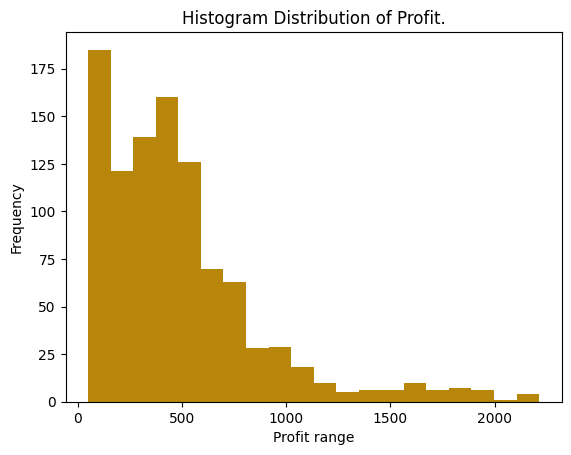

In [99]:
plt.hist(Data_df['Profit'], bins= 20, color='darkgoldenrod')

plt.title('Histogram Distribution of Profit.')

plt.ylabel('Frequency')

plt.xlabel('Profit range')

plt.savefig('Hist_Profit_rel.png')

plt.show()

## Histogram visualization (Frequency distribution of Cost)

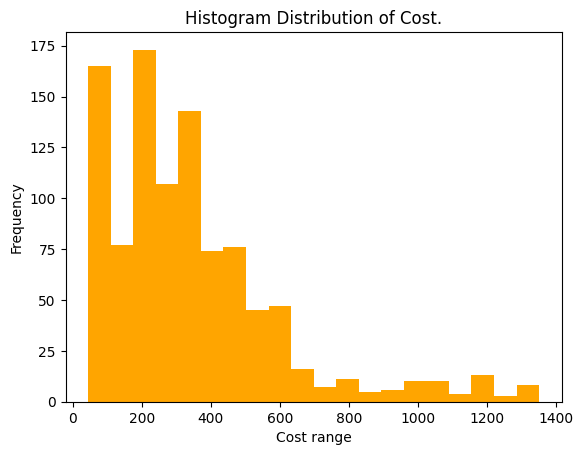

In [98]:
plt.hist(Data_df['Cost'], bins= 20, color='orange')

plt.title('Histogram Distribution of Cost.')

plt.ylabel('Frequency')

plt.xlabel('Cost range')

plt.savefig('Hist_Cost_rel.png')

plt.show()

## Histogram visualization (Frequency distribution of Revenue)

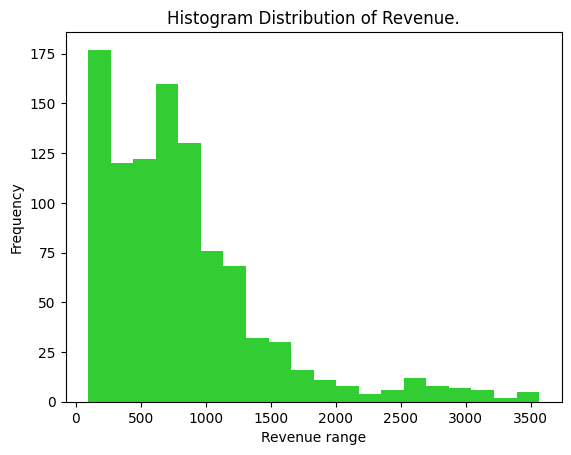

In [115]:
plt.hist(Data_df['Revenue'], bins= 20, color='limegreen')
plt.title('Histogram Distribution of Revenue.')

plt.ylabel('Frequency')

plt.xlabel('Revenue range')

plt.savefig('Hist_Revenue_rel.png')

plt.show()

Text(0.5, 1.0, 'RELATIONSHIP BETWEEN PROFIT AND REVENUE AGAINST COST')

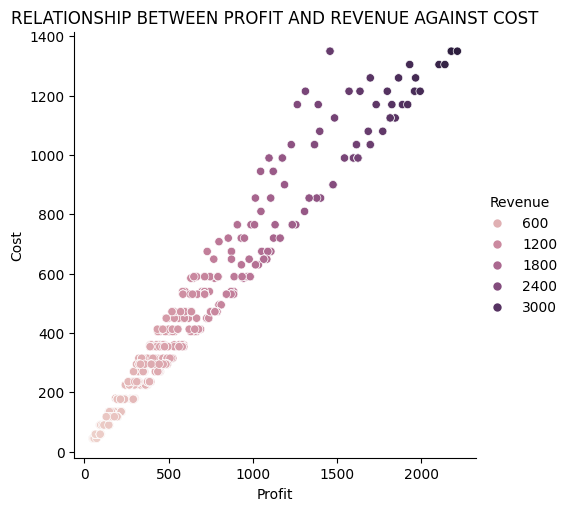

In [100]:
#SCATTER PLOT TO SHOW RELATIONSHIP BETWEEN PROFIT AND REVENUE AGAINST COST
sns.relplot(x='Profit', y='Cost', hue= 'Revenue', data=Data_df)
plt.title('RELATIONSHIP BETWEEN PROFIT AND REVENUE AGAINST COST')

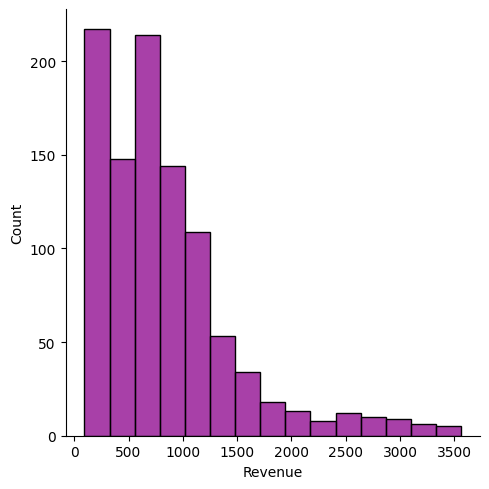

In [112]:
sns.displot(Data_df['Revenue'], color='darkmagenta', bins=15)

In [39]:
# Value count of the countries 

country= pd.crosstab(index=df["Country"], columns='count')
country

col_0,count
Country,
Australia,196
Canada,148
France,84
Germany,84
United Kingdom,110
United States,378


Text(0.5, 0, 'Country')

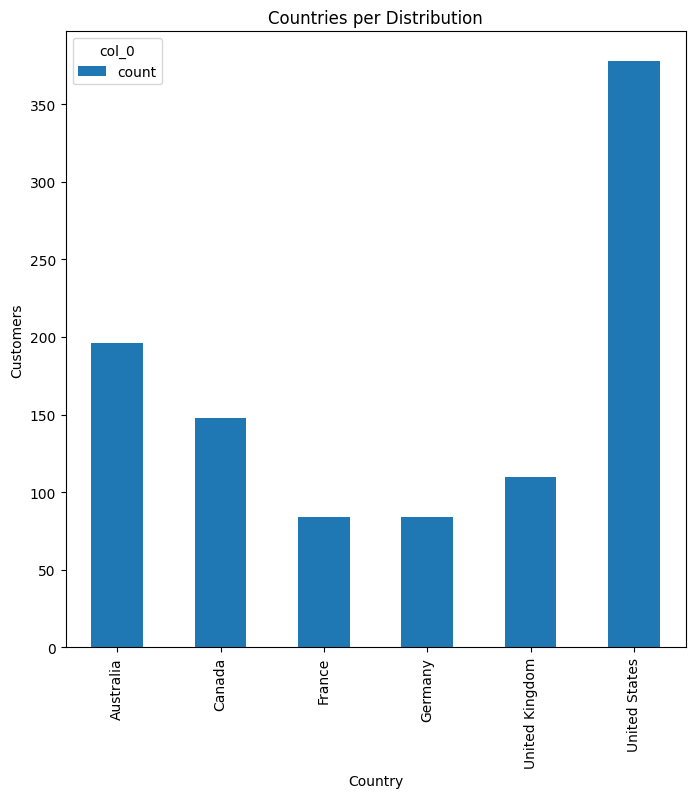

In [40]:
country.plot(kind="bar", figsize=(8,8))

plt.title('Countries per Distribution')

plt.ylabel('Customers')

plt.xlabel('Country')

## Sales Distribution by Sales

In [41]:
State= pd.crosstab(index=df["State"], columns='count')
State

col_0,count
State,
Alberta,4
Bayern,8
British Columbia,144
California,210
England,110
Essonne,4
Hamburg,8
Hauts de Seine,6
Hessen,16


Text(0.5, 0, 'States')

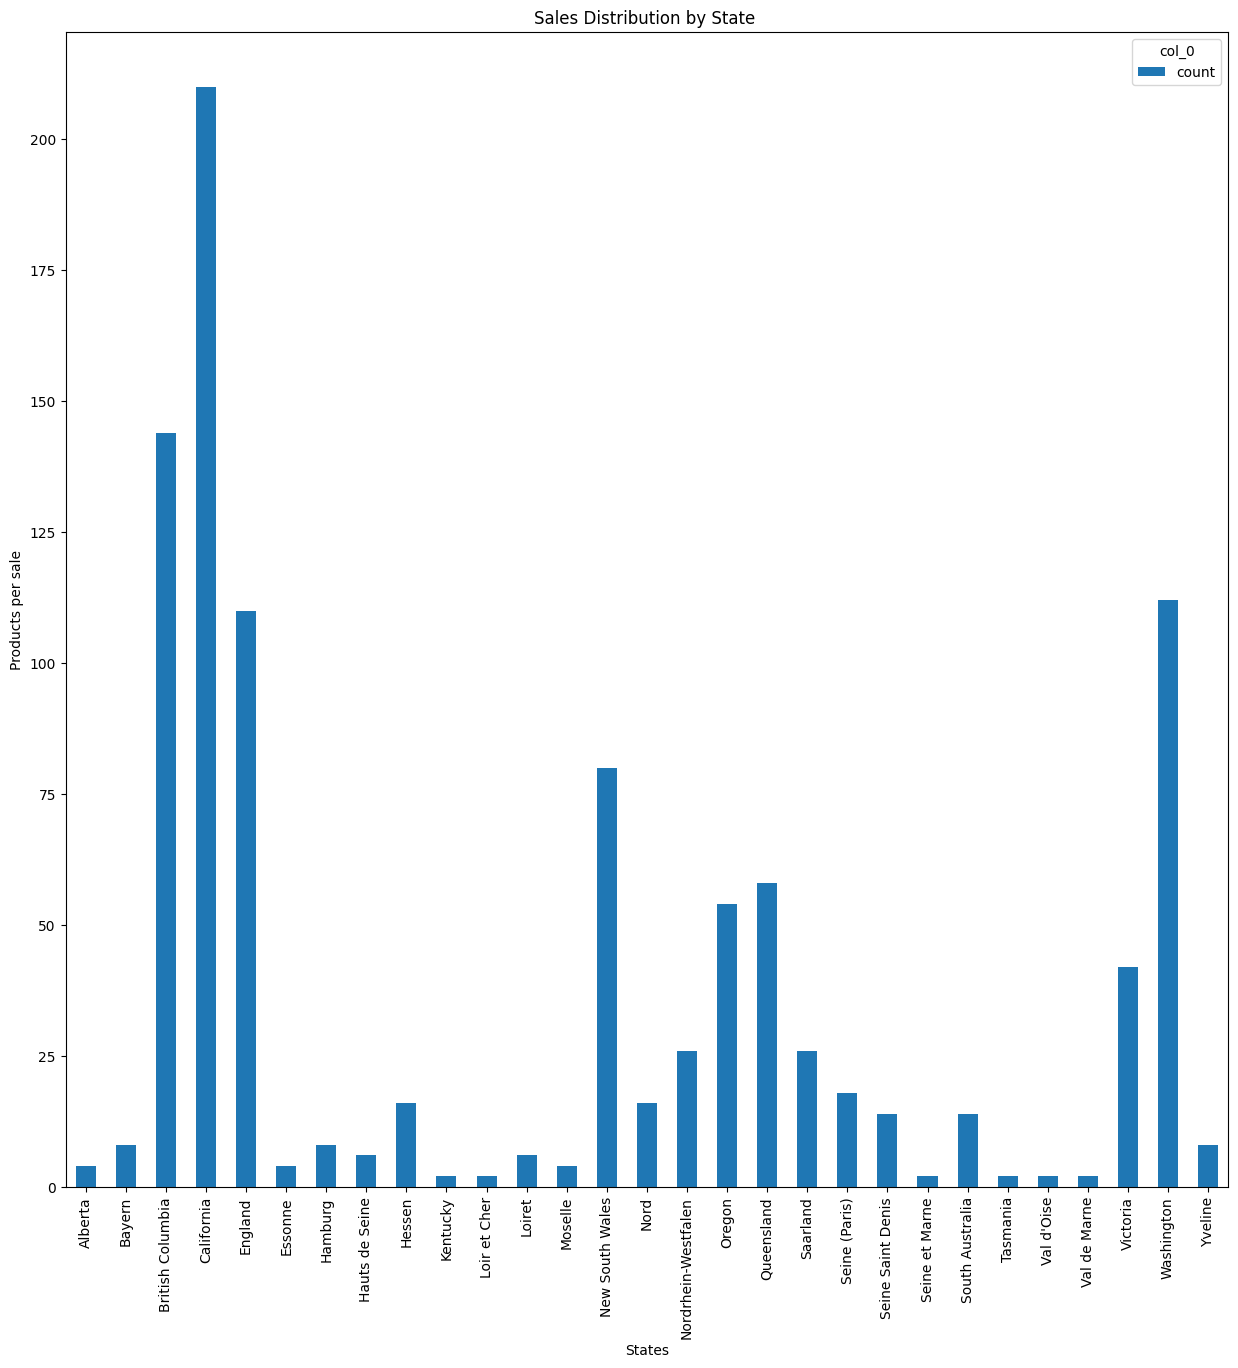

In [42]:
State = pd.crosstab(index=df["State"], columns='count')

State.plot(kind="bar", figsize=(15,15))

plt.title("Sales Distribution by State ")

plt.ylabel("Products per sale")

plt.xlabel("States")

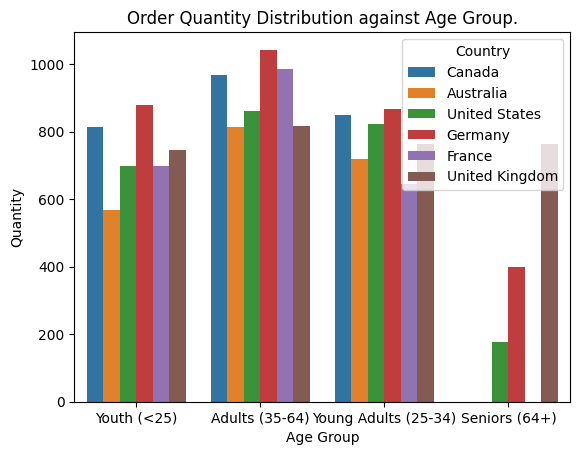

In [43]:
sns.barplot(data = df, y='Revenue', x='Age_Group', hue='Country', errorbar=None)
plt.title('Order Quantity Distribution against Age Group.')
plt.xlabel('Age Group')
plt.ylabel('Quantity')

plt.show()

## Pie Chart to show the country by revenue

In [44]:
Country= df['Country'].value_counts()

In [45]:
plt.figure(figsize =(100, 100))

<Figure size 10000x10000 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

([<matplotlib.patches.Wedge at 0x2155f3c7ad0>,
 [Text(-1.4563224023102221, -0.7756449319949069, 'United States'),
  Text(1.090300157434269, -1.2384448177851157, 'Australia'),
  Text(1.6058775723329803, 0.3790214013455364, 'Canada'),
  Text(0.8319733589113293, 1.42489309425718, 'United Kingdom'),
  Text(-0.13347626321804998, 1.6445923772039521, 'Germany'),
  Text(-0.9435681381951082, 1.3535801300931607, 'France')],
 [Text(-0.7943576739873938, -0.42307905381540367, '37.80%'),
  Text(0.5947091767823284, -0.6755153551555176, '19.60%'),
  Text(0.8759332212725345, 0.20673894618847435, '14.80%'),
  Text(0.4538036503152704, 0.7772144150493707, '11.00%'),
  Text(-0.0728052344825727, 0.8970503875657919, '8.40%'),
  Text(-0.5146735299246044, 0.7383164345962693, '8.40%')])

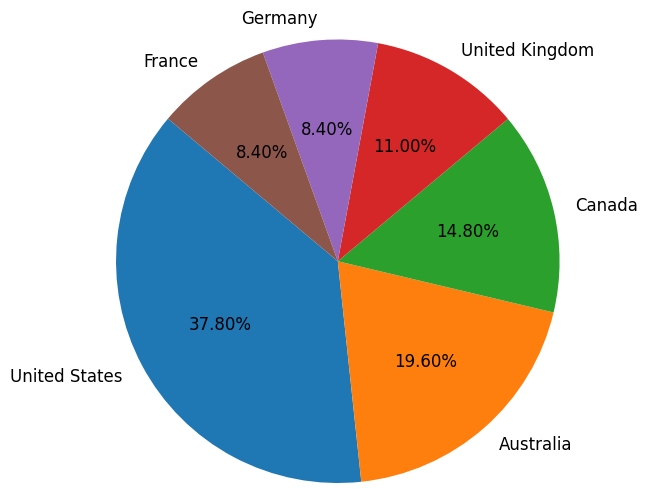

In [46]:
plt.pie(Country, labels = Country.index, autopct = '%1.2f%%', startangle = 140, textprops={'size': 'larger'}, radius=1.5)

### Checking for Correlation between our Mean and Median 

In [47]:
skewed_df = df[numerical]

Text(0.5, 0, 'Numerical Values')

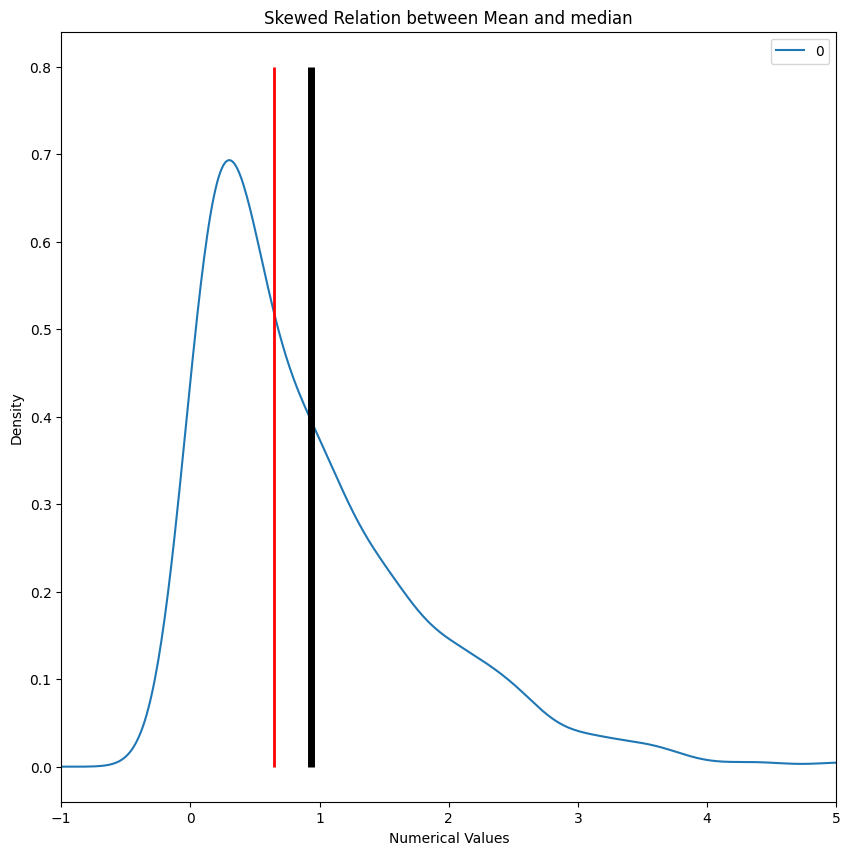

In [48]:
skewed_df = pd.DataFrame(np.random.exponential(size=1000))

skewed_df.plot(kind="density", figsize=(10,10), xlim=(-1,5));

plt.vlines(skewed_df.mean(), ymin=0, ymax=0.8, linewidth=5.0, color='black');  # Plot black at mean

plt.vlines(skewed_df.median(), ymin=0, ymax=0.8, linewidth=2.0, color='red')  # Plot red line at median

plt.title("Skewed Relation between Mean and median");

plt.xlabel("Numerical Values")

### The mean is also influenced heavily by the outliers, whiles the median resist the influence of the outliers

In [49]:
norm_data = df[numerical]

Text(0.5, 0, 'Numerical Values')

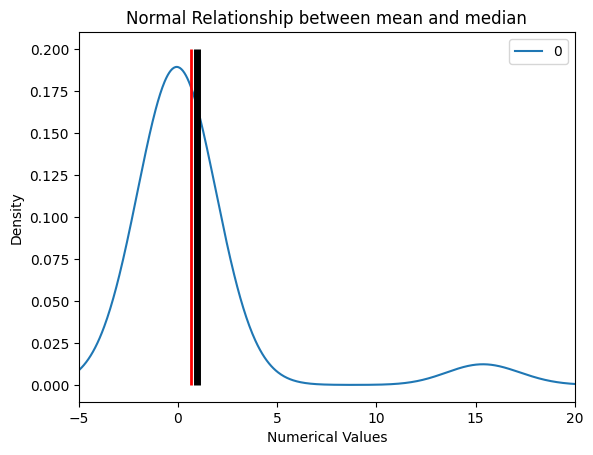

In [50]:
norm_data = np.random.normal(size=50)

outliers = np.random.normal(15, size=3);

combine_data = pd.DataFrame(np.concatenate((norm_data, outliers), axis=0));

combine_data.plot(kind="density", xlim=(-5, 20));

plt.vlines(skewed_df.mean(), ymin=0, ymax=0.2, linewidth=5.0, color='black');  # Plot black at mean

plt.vlines(skewed_df.median(), ymin=0, ymax=0.2, linewidth=2.0, color='red')  # Plot red line at median

plt.title("Normal Relationship between mean and median")

plt.xlabel("Numerical Values")

#### Since the the median tends to resist the effect of skewness and outliers, it is as known a "robust" statistics,
#### the median generally gives sense of typical value in a distribution with significant skew or outliers